In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


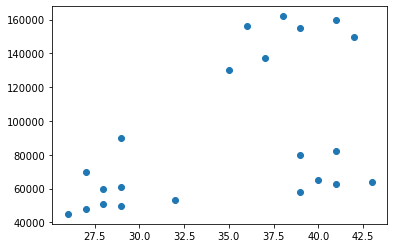

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [7]:
y_predict = km.fit_predict(df[['Age','Income($)']])

In [8]:
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [9]:
df['cluster'] = y_predict

In [10]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


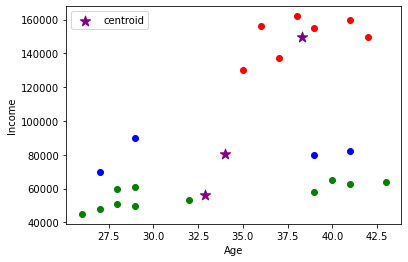

In [11]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
plt.scatter(df0.Age,df0['Income($)'],color = 'g')
plt.scatter(df1.Age,df1['Income($)'],color = 'r')
plt.scatter(df2.Age,df2['Income($)'],color = 'b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker='*',label='centroid',s=120)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['Income($)'] = sc.fit_transform(df[['Income($)']])
df.Age = sc.fit_transform(df[['Age']])

In [13]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [15]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [16]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [17]:
#sum of means squared error
km.inertia_

0.4750783498553097

In [18]:
df.drop('cluster',inplace=True,axis=1)

In [19]:
df['cluster'] = y_predicted

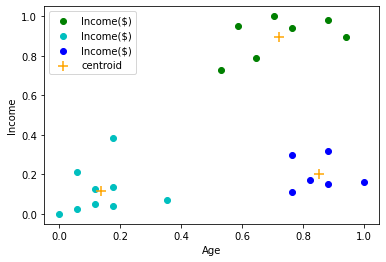

In [20]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
plt.scatter(df0.Age,df0['Income($)'],color = 'g',label='Income($)')
plt.scatter(df1.Age,df1['Income($)'],color = 'c',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color = 'b',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'orange',marker='+',label='centroid',s=120)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [21]:
k_rng = range(1,10)
SSE = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    SSE.append(km.inertia_)

In [22]:
SSE

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2621792762345213,
 0.22395807059250125,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

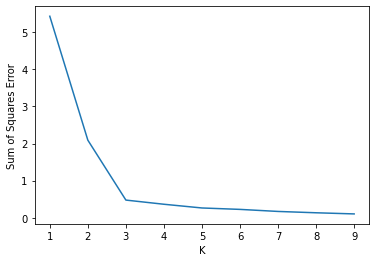

In [23]:
plt.xlabel('K')
plt.ylabel('Sum of Squares Error')
plt.plot(k_rng,SSE)